In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set paths for the images - case 1
template_path = os.path.join(os.getcwd(), 'data', 'images', 'template.jpeg')
image_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')

In [3]:
# Load the images in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)

# Check if images loaded correctly
if image is None or template is None:
    print("Error: Could not read one of the images.")
    exit()

# Resize the template if necessary
# You can adjust the resize factor based on your requirements
small_template = cv2.resize(template, (template.shape[1] // 5, template.shape[0] // 5), interpolation=cv2.INTER_AREA)

# Apply template matching with different methods
result = cv2.matchTemplate(image, small_template, cv2.TM_CCOEFF_NORMED)

# Determine the maximum correlation value and its location
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Set a dynamic threshold based on the maximum correlation value
# Lower the threshold if necessary; can also experiment with values.
threshold = 0.7  # This can be tuned
locations = np.where(result >= threshold)

# Check if any matching locations are found
match_found = len(locations[0]) > 0

# Draw rectangles around matched locations on the original image
for pt in zip(*locations[::-1]):  # Switch columns and rows
    cv2.rectangle(image, pt, (pt[0] + small_template.shape[1], pt[1] + small_template.shape[0]), (0, 255, 0), 2)

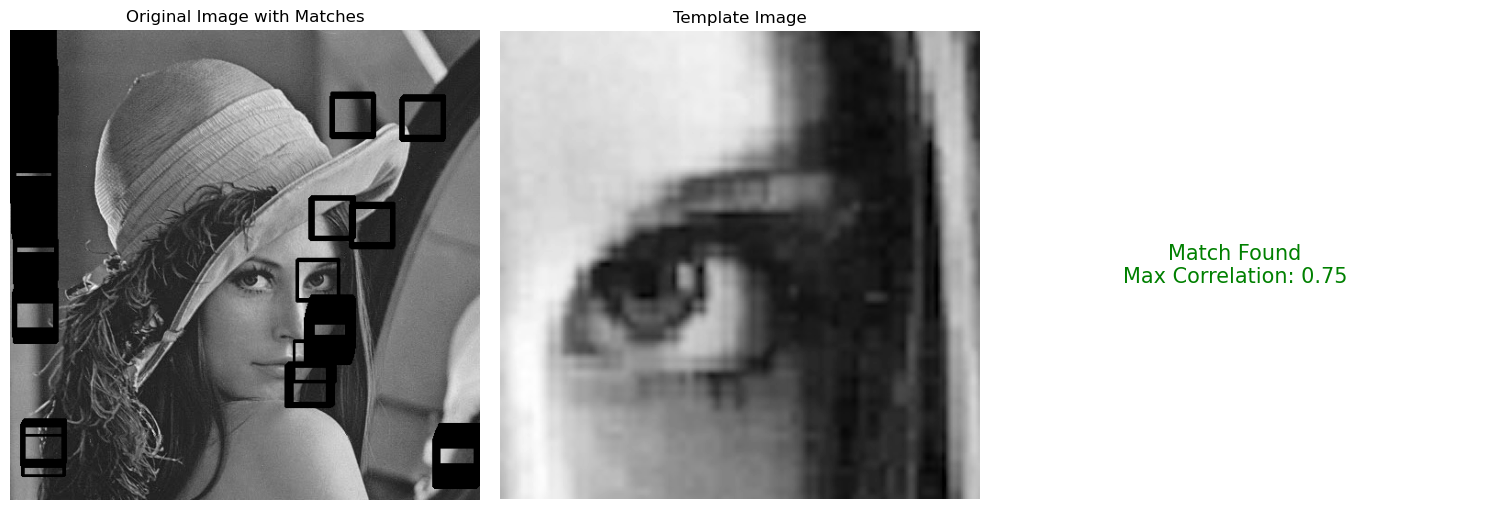

In [4]:
# Display results
plt.figure(figsize=(15, 5))

# Display the original image with matches
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image with Matches')
plt.axis('off')

# Display the original template image
plt.subplot(1, 3, 2)
plt.imshow(template, cmap='gray')
plt.title('Template Image')
plt.axis('off')

# Display match result
plt.subplot(1, 3, 3)
if match_found:
    plt.text(0.5, 0.5, f'Match Found\nMax Correlation: {max_val:.2f}', fontsize=15, ha='center', va='center', color='green')
else:
    plt.text(0.5, 0.5, 'No Match Found', fontsize=15, ha='center', va='center', color='red')
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()